## Proyecto Modelo de Regresion Lineal

- Librerias

In [38]:
import pandas as pd
import math 
import numpy as np
import matplotlib.pyplot as plt  

- Lectura de datos

In [39]:
df = pd.read_csv('values.csv')
x = df['x']
y = df['y']

- Grafica de datos

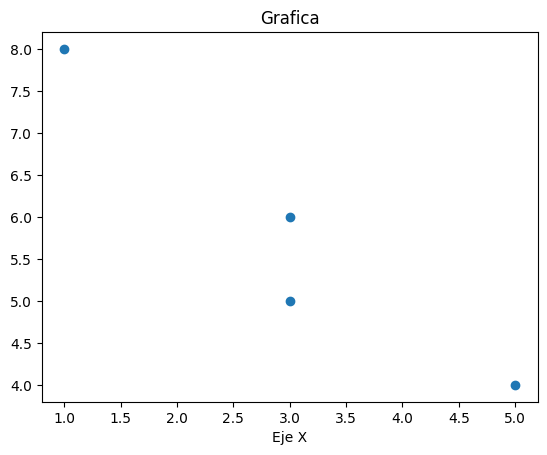

In [40]:
fig, ax =plt.subplots()
ax.scatter(x,y)
ax.set_title('Grafica')
ax.set_xlabel('Eje X')
ax.set_label('Eje Y')

plt.show()

### Coeficiente de relacion lineal

#### **Requisitos**
-------------------------------------------------
Dado cualquier conjunto de datos muestrales apareados, siempre se puede calcular
el coeficiente de correlación lineal r, pero se deben satisfacer los siguientes requisi-
tos cuando se prueban hipótesis o cuando se hacen inferencias acerca de r.
1. La muestra de datos apareados (x, y) es una muestra aleatoria de datos cuantita-
tivos. (Es importante que los datos muestrales no se hayan reunido por medio
de algún método inapropiado, como una muestra de respuesta voluntaria).
2. El examen visual del diagrama de dispersión debe confirmar que los puntos se
acercan al patrón de una línea recta.
3. Es necesario eliminar cualquier valor extremo, si se sabe que se trata de un
error. Los efectos de cualquier otro valor extremo deben tomarse en cuenta
calculando r con y sin el valor extremo incluido.

*Nota*: Los requisitos 2 y 3 se simplifican al verificar el siguiente requisito formal:

Los pares de datos (x, y) tienen una distribución normal bivariada. (Las distri-
buciones normales se estudiaron en el capítulo 6, pero este supuesto requiere que, para
cualquier valor fijo de x, los valores correspondientes de y tengan una distribución con
forma de campana, y que para cualquier valor fijo de y, los valores de x tengan tam-
bién una distribución con forma de campana). 

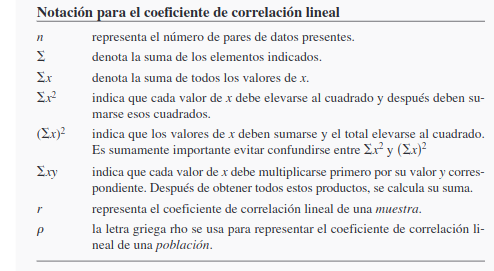
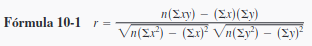

- Calculo de estadisticos para r

In [48]:
xi = sum(x)
yi = sum(y)
n = len(x)
mult_xyi = sum(x*y)
cuad_xi = sum(x**2)
cuad_yi = sum(y**2)

def coef_r(mult_xyi,cuad_xi,cuad_yi, xi, yi,n):
    r = ((n * mult_xyi) - (xi*yi)) / (math.sqrt(n*cuad_xi - xi**2) * math.sqrt(n*cuad_yi -yi**2))
    return r

r = coef_r(mult_xyi,cuad_xi,cuad_yi, xi, yi,n)
r

-0.9561828874675149

### Interpretacion de r

El valor de r siempre debe estar entre -1 y +1, inclusive. Si r se acerca a 0, conclui-
mos que no existe una correlación lineal entre x y y, pero si r se acerca -1 o +1,
concluimos que hay una correlación lineal entre x y y. 

1. El valor de r está siempre entre -1 y +1, inclusive. Es decir,
-1 <= r >= +1
2. El valor de r no cambia si todos los valores de cualquiera de las variables se
convierten a una escala diferente.
3. El valor de r no se ve afectado por la elección de x o y. Intercambie todos los
valores de x y y, y el valor de r no sufrirá cambios.
4. r mide la fuerza de una relación lineal. No está diseñada para medir la fuerza
de una relación que no sea lineal.

In [49]:
tolerancia = 1e-5

if abs(r) <= tolerancia:
    print('No existe una correlacion lineal entre las variables.')
else:
    print('Existe una correlacion lineal entre las variables.')

Existe una correlacion lineal entre las variables.


## Regresion

1. La muestra de datos apareados (x, y) es una muestra aleatoria de datos cuan-
titativos.
2. El examen visual del diagrama de dispersión indica que los puntos se aproxi-
man al patrón de una línea recta.
3. Se debe eliminar cualquier valor extremo, si se sabe que es un error. Es impor-
tante tomar en cuenta los efectos de cualquier valor extremo que no sea un error
conocido.
Nota: Los requisitos 2 y 3 representan una verificación simplificada de los siguien-
tes requisitos formales del análisis de regresión:
- Para cada valor fijo de x, los valores correspondientes de y tienen una distribu-
ción en forma de campana.
- Para los distintos valores fijos de x, las distribuciones de los valores correspondien-
tes de y tienen la misma varianza. (Esto se viola si parte del diagrama de dispersión
presenta puntos muy cercanos a la línea de regresión, mientras otra porción del
diagrama presenta puntos que se alejan mucho de la línea de regresión. Consulte la
explicación de los puntos residuales casi al final de esta sección).
- Para los distintos valores fijos de x, las distribuciones de los valores correspon-
dientes de y tienen medias que se ubican en la misma línea recta.
- Los valores de y son independientes.
Los resultados no se ven muy afectados si la distribución no se aleja demasiado de la
normalidad y si las varianzas no son demasiado diferentes.

### Definiciones
Dado un conjunto de datos muestrales apareados, la ecuación de regresión:
 
 ŷ = b0 + b1x

 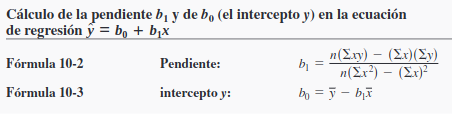

- Calculo de pendiente e intercepto

In [54]:
def pendiente(mult_xyi,cuad_xi,xi, yi,n):
    m = (n*mult_xyi - xi*yi) / (n*(cuad_xi) - xi**2)
    b1 = m
    return b1
b1 = pendiente(mult_xyi,cuad_xi,xi, yi,n)

def intercepto(x,y,b1):
    itp = np.mean(y) - b1*np.mean(x)
    b0 = itp
    return b0
b0 = intercepto(x,y,b1)

- Grafica

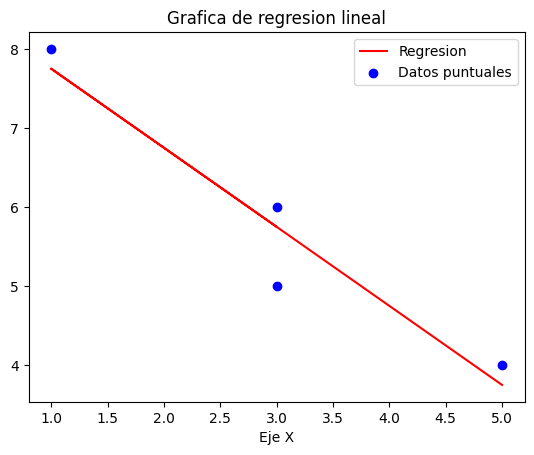

In [59]:
def regression(x,y,b1,b0):
    a = b0 + b1*x
    return a

yreg = regression(x,y,b1,b0)

fig, ax =plt.subplots()
ax.plot(x,yreg, color='red', label='Regresion')
ax.scatter(x,y, color ='blue', label='Datos puntuales')
ax.set_title('Grafica de regresion lineal')
ax.set_xlabel('Eje X')
ax.set_label('Eje Y')
ax.legend()

plt.show()